In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\Admin\\ML PROJECT'

In [3]:

os.chdir('E:\\afitech\\Afitech PPML Datasets\\LOGISTIC REGRESSION CREDIT RISK USE CASE')
os.getcwd()

'E:\\afitech\\Afitech PPML Datasets\\LOGISTIC REGRESSION CREDIT RISK USE CASE'

In [4]:
trainfile='C1_Train_Data.csv'
testfile='C1_Test_Data.csv'
validfile='C1_Validate_Data.csv'

In [5]:
traindf=pd.read_csv(trainfile)
testdf=pd.read_csv(testfile)
validdf=pd.read_csv(validfile)

In [6]:
print(traindf.shape)
print(testdf.shape)
print(validdf.shape)

(614, 13)
(367, 12)
(367, 13)


In [7]:
print(traindf.info())
print(testdf.info())
print(validdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            3

In [8]:
validdf.rename(columns={'outcome': 'Loan_Status'},inplace=True)

In [9]:
traindf.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
traindf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
print(traindf.columns)
print(traindf.isnull().sum())
print(testdf.columns)
print(testdf.isnull().sum())
print(validdf.columns)
print(validdf.isnull().sum())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount

In [12]:
sumsetdf=pd.concat([traindf,testdf,validdf],axis=0,sort=False)
#it concats all rows of 3 datasets 1 after another, not in middle of the row.

In [13]:
print(sumsetdf.info())
print(sumsetdf.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1313 non-null object
Married              1345 non-null object
Dependents           1313 non-null object
Education            1348 non-null object
Self_Employed        1270 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1316 non-null float64
Loan_Amount_Term     1322 non-null float64
Credit_History       1240 non-null float64
Property_Area        1348 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 147.4+ KB
None
(1348, 13)


In [14]:
sumsetdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
sumsetdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [16]:
sumsetdf.reset_index(inplace=True,drop=True)
#drop reminds the previous dataset,so that any time we could recall it.

In [17]:
sumsetdf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1343,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
1344,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
1345,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
1346,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
1347,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [18]:
sumsetdf.isnull().sum()

Loan_ID                0
Gender                35
Married                3
Dependents            35
Education              0
Self_Employed         78
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            32
Loan_Amount_Term      26
Credit_History       108
Property_Area          0
Loan_Status          367
dtype: int64

In [19]:
print(sumsetdf['Credit_History'].value_counts(dropna=False))
print(sumsetdf['Dependents'].value_counts(dropna=False))
print(sumsetdf['Gender'].value_counts(dropna=False))
print(sumsetdf['LoanAmount'].value_counts(dropna=False))
print(sumsetdf['Loan_Amount_Term'].value_counts(dropna=False))
print(sumsetdf['Married'].value_counts(dropna=False))
print(sumsetdf['Self_Employed'].value_counts(dropna=False))

1.0    1033
0.0     207
NaN     108
Name: Credit_History, dtype: int64
0      745
2      219
1      218
3+     131
NaN     35
Name: Dependents, dtype: int64
Male      1061
Female     252
NaN         35
Name: Gender, dtype: int64
120.0    38
110.0    37
100.0    33
NaN      32
150.0    31
         ..
405.0     1
265.0     1
42.0      1
279.0     1
73.0      1
Name: LoanAmount, Length: 233, dtype: int64
360.0    1134
180.0      88
480.0      31
300.0      27
NaN        26
240.0      12
84.0       10
120.0       5
36.0        4
60.0        4
12.0        3
350.0       2
6.0         2
Name: Loan_Amount_Term, dtype: int64
Yes    864
No     481
NaN      3
Name: Married, dtype: int64
No     1114
Yes     156
NaN      78
Name: Self_Employed, dtype: int64


In [20]:
sumsetdf['Credit_History'].value_counts(dropna=False)

1.0    1033
0.0     207
NaN     108
Name: Credit_History, dtype: int64

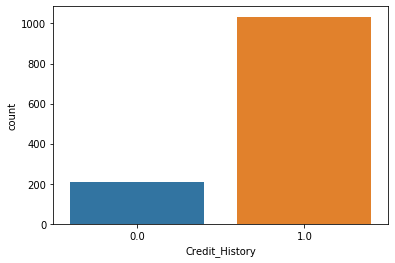

In [21]:
sb.countplot(x="Credit_History",data=sumsetdf)
plt.show()

In [22]:
Credit_History_Null=sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()
print(Credit_History_Null)

[16, 24, 30, 42, 79, 83, 86, 95, 117, 125, 129, 130, 156, 181, 187, 198, 219, 236, 237, 259, 260, 279, 309, 313, 317, 318, 323, 348, 363, 377, 392, 395, 411, 444, 449, 451, 460, 473, 490, 491, 497, 503, 506, 530, 533, 544, 556, 565, 583, 600, 617, 626, 640, 642, 659, 704, 713, 718, 729, 753, 757, 778, 791, 793, 799, 816, 834, 873, 876, 879, 896, 900, 919, 943, 950, 965, 972, 974, 978, 984, 993, 1007, 1009, 1026, 1071, 1080, 1085, 1096, 1120, 1124, 1145, 1158, 1160, 1166, 1183, 1201, 1240, 1243, 1246, 1263, 1267, 1286, 1310, 1317, 1332, 1339, 1341, 1345]


In [23]:
sumsetdf['Credit_History'].iloc[Credit_History_Null] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
Credit_History_Null=sumsetdf[sumsetdf["Credit_History"].isnull()].index.tolist()
print(Credit_History_Null)

[]


part C2:Genders.

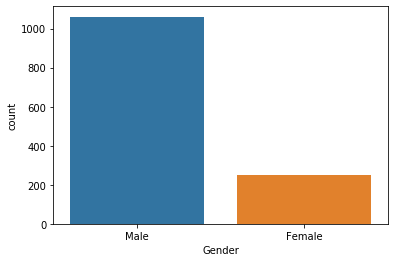

In [25]:
sb.countplot(x='Gender',data=sumsetdf)

In [26]:
Gender_Null=sumsetdf[sumsetdf['Gender'].isnull()].index.tolist()
print(Gender_Null)

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592, 636, 665, 720, 752, 823, 845, 859, 893, 910, 917, 932, 1003, 1032, 1087, 1119, 1190, 1212, 1226, 1260, 1277, 1284, 1299]


In [27]:
sumsetdf['Gender'].iloc[Gender_Null]="Male"

In [28]:
Gender_Null=sumsetdf[sumsetdf['Gender'].isnull()].index.tolist()
print(Gender_Null)

[]


part C3:Dependents

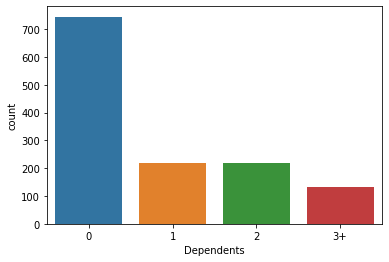

In [29]:
sb.countplot(x='Dependents',data=sumsetdf)

In [30]:
Dependents_Null=sumsetdf[sumsetdf['Dependents'].isnull()].index.tolist()
print(Dependents_Null)

[102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517, 571, 597, 660, 684, 725, 752, 816, 861, 865, 879, 916, 926, 1027, 1051, 1092, 1119, 1183, 1228, 1232, 1246, 1283, 1293]


In [31]:
sumsetdf['Dependents'].iloc[Dependents_Null]="0"

In [32]:
Dependents_Null=sumsetdf[sumsetdf['Dependents'].isnull()].index.tolist()
print(Dependents_Null)

[]


part C3: loanAmount

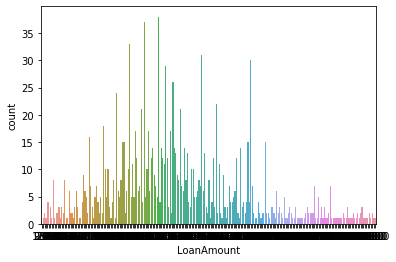

In [33]:
sb.countplot(x='LoanAmount',data=sumsetdf)

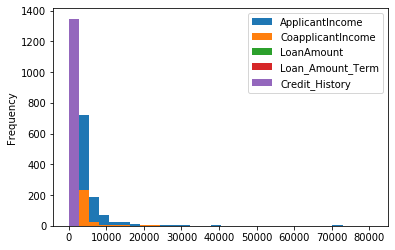

In [34]:
sumsetdf.plot(kind='hist',bins=30)

In [35]:
LoanAmount_Null=sumsetdf[sumsetdf['LoanAmount'].isnull()].index.tolist()
print(LoanAmount_Null)

[0, 35, 63, 81, 95, 102, 103, 113, 127, 202, 284, 305, 322, 338, 387, 435, 437, 479, 524, 550, 551, 605, 692, 715, 802, 861, 903, 1059, 1082, 1169, 1228, 1270]


In [36]:
median_value=sumsetdf['LoanAmount'].median()

In [37]:
sumsetdf['LoanAmount'].iloc[LoanAmount_Null]=median_value

In [38]:
LoanAmount_Null=sumsetdf[sumsetdf['LoanAmount'].isnull()].index.tolist()
print(LoanAmount_Null)

[]


part C4: Loan Amount Term

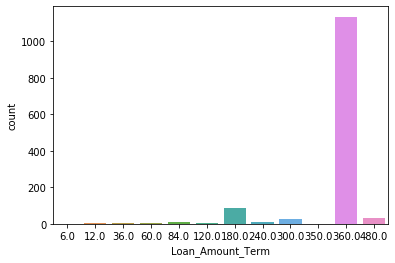

In [39]:
sb.countplot(x='Loan_Amount_Term',data=sumsetdf)

In [40]:
Loan_Amount_Term_Null=sumsetdf[sumsetdf['Loan_Amount_Term'].isnull()].index.tolist()
print(Loan_Amount_Term_Null)

[19, 36, 44, 45, 73, 112, 165, 197, 223, 232, 335, 367, 421, 423, 659, 662, 731, 743, 798, 828, 1026, 1029, 1098, 1110, 1165, 1195]


In [41]:
sumsetdf['Loan_Amount_Term'].iloc[Loan_Amount_Term_Null]="360"

In [42]:
Loan_Amount_Term_Null=sumsetdf[sumsetdf['Loan_Amount_Term'].isnull()].index.tolist()
print(Loan_Amount_Term_Null)

[]


part C5: married

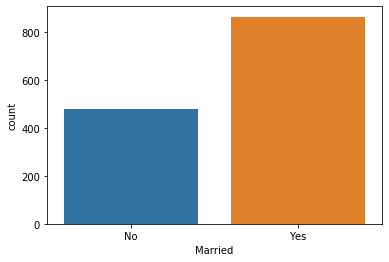

In [43]:
sb.countplot(x='Married',data=sumsetdf)

In [44]:
Married_Null=sumsetdf[sumsetdf['Married'].isnull()].index.tolist()
print(Married_Null)

[104, 228, 435]


In [45]:
sumsetdf['Married'].iloc[Married_Null]="Yes"

In [46]:
Married_Null=sumsetdf[sumsetdf['Married'].isnull()].index.tolist()
print(Married_Null)

[]


part C3: Self Employed

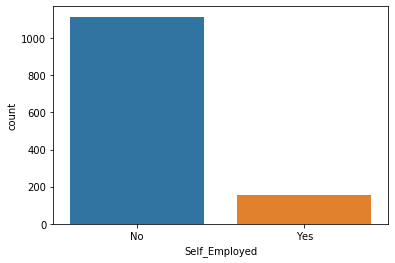

In [47]:
sb.countplot(x='Self_Employed',data=sumsetdf)

In [48]:
Self_Employed_Null=sumsetdf[sumsetdf['Self_Employed'].isnull()].index.tolist()
print(Self_Employed_Null)

[11, 19, 24, 29, 30, 95, 107, 111, 114, 158, 170, 218, 231, 236, 268, 295, 333, 336, 344, 374, 380, 385, 411, 432, 447, 463, 468, 535, 542, 579, 600, 601, 622, 625, 627, 650, 686, 703, 756, 775, 782, 789, 806, 857, 869, 873, 890, 892, 899, 901, 908, 911, 915, 937, 940, 989, 992, 994, 1017, 1053, 1070, 1123, 1142, 1149, 1156, 1173, 1224, 1236, 1240, 1257, 1259, 1266, 1268, 1275, 1278, 1282, 1304, 1307]


In [49]:
sumsetdf['Self_Employed'].iloc[Self_Employed_Null]="No"

In [50]:
Self_Employed_Null=sumsetdf[sumsetdf['Self_Employed'].isnull()].index.tolist()
print(Self_Employed_Null)

[]


In [51]:
sumsetdf.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

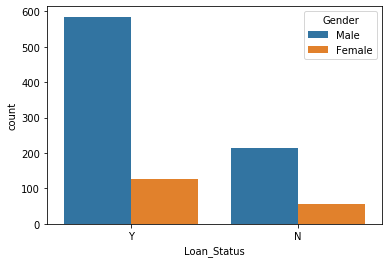

In [52]:
sb.countplot(x='Loan_Status',hue='Gender',data=sumsetdf)

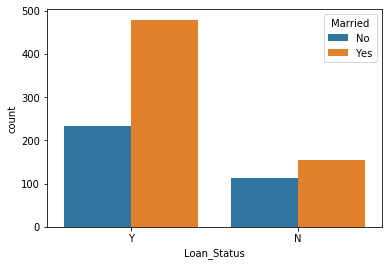

In [53]:
sb.countplot(x='Loan_Status',hue='Married',data=sumsetdf)

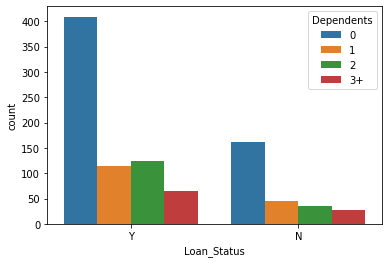

In [54]:
sb.countplot(x='Loan_Status',hue='Dependents',data=sumsetdf)

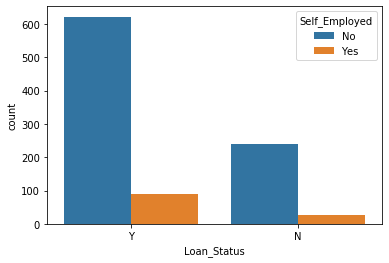

In [55]:
sb.countplot(x='Loan_Status',hue='Self_Employed',data=sumsetdf)

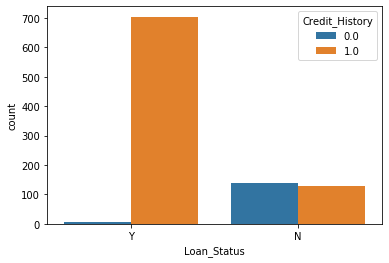

In [56]:
sb.countplot(x='Loan_Status',hue='Credit_History',data=sumsetdf)

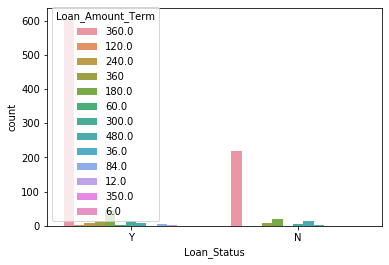

In [57]:
sb.countplot(x='Loan_Status',hue='Loan_Amount_Term',data=sumsetdf)

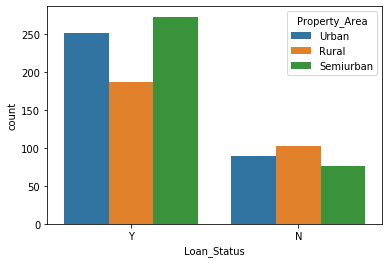

In [58]:
sb.countplot(x='Loan_Status',hue='Property_Area',data=sumsetdf)

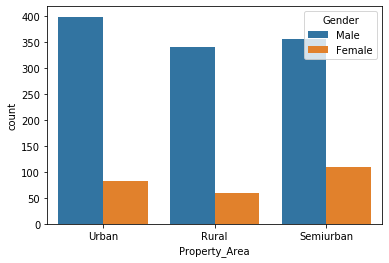

In [59]:
sb.countplot(x='Property_Area',hue='Gender',data=sumsetdf)

In [60]:
sumsetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 13 columns):
Loan_ID              1348 non-null object
Gender               1348 non-null object
Married              1348 non-null object
Dependents           1348 non-null object
Education            1348 non-null object
Self_Employed        1348 non-null object
ApplicantIncome      1348 non-null int64
CoapplicantIncome    1348 non-null float64
LoanAmount           1348 non-null float64
Loan_Amount_Term     1348 non-null object
Credit_History       1348 non-null float64
Property_Area        1348 non-null object
Loan_Status          981 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 137.0+ KB


In [61]:
sdf=sumsetdf.drop(['Loan_ID'],axis=1)
sdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,126.0,360,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360,1.0,Urban,Y
1344,Male,Yes,0,Graduate,No,4158,709.0,115.0,360,1.0,Urban,Y
1345,Male,No,0,Graduate,No,3250,1993.0,126.0,360,1.0,Semiurban,Y
1346,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360,1.0,Rural,N


In [62]:
sumsetdfdum=pd.get_dummies(sdf,drop_first=True)
sumsetdfdum

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,126.0,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.0,1.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3000,0.0,66.0,1.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,2583,2358.0,120.0,1.0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.0,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4009,1777.0,113.0,1.0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,1
1344,4158,709.0,115.0,1.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1345,3250,1993.0,126.0,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1346,5000,2393.0,158.0,1.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
traindata=sumsetdfdum[0:614]
testdata=sumsetdfdum[614:981]
validdata=sumsetdfdum[981:]

In [64]:
traindata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
609,2900,0.0,71.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
610,4106,0.0,40.0,1.0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
611,8072,240.0,253.0,1.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
612,7583,0.0,187.0,1.0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
613,4583,0.0,133.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [65]:
testdata.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
976,4009,1777.0,113.0,1.0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
977,4158,709.0,115.0,1.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
978,3250,1993.0,126.0,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
979,5000,2393.0,158.0,1.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
980,9200,0.0,98.0,1.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [66]:
validdata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,...,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
981,5720,0.0,110.0,1.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
982,3076,1500.0,126.0,1.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
983,5000,1800.0,208.0,1.0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
984,2340,2546.0,100.0,1.0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
985,3276,0.0,78.0,1.0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [67]:
Xtrain=traindata.drop(['Loan_Status_Y'],axis=1)
Ytrain=traindata['Loan_Status_Y']

Xtest=validdata.drop(['Loan_Status_Y'],axis=1)
Ytest=validdata['Loan_Status_Y']

In [68]:
from sklearn.linear_model import LogisticRegression as LR1

In [69]:
log_reg=LR1()

In [70]:
log_reg.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_predict=log_reg.predict(Xtest)

In [72]:
print(y_predict)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [73]:
print(type(y_predict))

<class 'numpy.ndarray'>


In [74]:
print(Ytest)

981     1
982     1
983     1
984     1
985     0
       ..
1343    1
1344    1
1345    1
1346    0
1347    1
Name: Loan_Status_Y, Length: 367, dtype: uint8


In [75]:
print(type(Ytest))

<class 'pandas.core.series.Series'>


In [76]:
if len(Ytest)==len(y_predict) : print("Length compatible")

Length compatible


In [77]:
l1=list(Ytest)
l2=list(y_predict)

In [78]:
count=0
for m in range(len(l1)):
        if l1[m] == l2[m]:
            count += 1
            
print('matches=',count)
print('accuracy=',count*100/len(l1))

matches= 346
accuracy= 94.27792915531334


In [79]:
count=0
for m,n in zip(l1,l2):
        if m ==n:
            count += 1
            
print('matches=',count)
print('accuracy=',count*100/len(l1))

matches= 346
accuracy= 94.27792915531334


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(confusion_matrix(Ytest, y_predict))

[[ 58  19]
 [  2 288]]


In [82]:
print(classification_report(Ytest,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        77
           1       0.94      0.99      0.96       290

    accuracy                           0.94       367
   macro avg       0.95      0.87      0.91       367
weighted avg       0.94      0.94      0.94       367

